<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/Granger_Causality_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
#build the time series, just a simple AR(1)
t1 = [0.1*np.random.normal()]
for _ in range(100):
    t1.append(0.5*t1[-1] + 0.1*np.random.normal())


In [8]:
#build the time series that is granger caused by t1
t2 = [item + 0.1*np.random.normal() for item in t1]

In [9]:
#adjust t1 and t2
t1 = t1[3:]
t2 = t2[:-3]

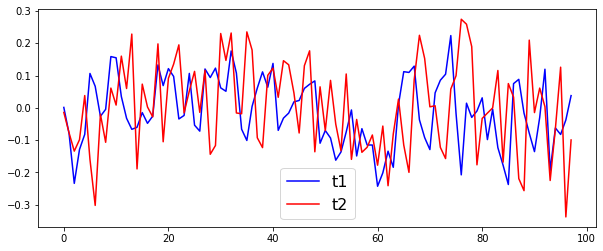

In [10]:
plt.figure(figsize=(10,4))
plt.plot(t1, color='b')
plt.plot(t2, color='r')

plt.legend(['t1', 't2'], fontsize=16)

In [11]:
ts_df = pd.DataFrame(columns=['t2', 't1'], data=zip(t2,t1))

In [12]:
ts_df

,t2,t1
0,-0.014298,0.001185
1,-0.077360,-0.079410
2,-0.134270,-0.234170
3,-0.098783,-0.129095
4,0.037942,-0.082364
...,...,...
93,-0.225213,-0.194250
94,-0.064346,-0.062613
95,0.125872,-0.082641
96,-0.338125,-0.037595


In [13]:
gc_res = grangercausalitytests(ts_df, 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6480  , p=0.4229  , df_denom=94, df_num=1
ssr based chi2 test:   chi2=0.6686  , p=0.4135  , df=1
likelihood ratio test: chi2=0.6664  , p=0.4143  , df=1
parameter F test:         F=0.6480  , p=0.4229  , df_denom=94, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.9601  , p=0.0037  , df_denom=91, df_num=2
ssr based chi2 test:   chi2=12.5752 , p=0.0019  , df=2
likelihood ratio test: chi2=11.8171 , p=0.0027  , df=2
parameter F test:         F=5.9601  , p=0.0037  , df_denom=91, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=27.8284 , p=0.0000  , df_denom=88, df_num=3
ssr based chi2 test:   chi2=90.1262 , p=0.0000  , df=3
likelihood ratio test: chi2=63.3803 , p=0.0000  , df=3
parameter F test:         F=27.8284 , p=0.0000  , df_denom=88, df_num=3
